In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 線性迴歸

### 做一條直線

In [2]:
x = np.linspace(0,5,50)
y = 1.2*x + 0.8

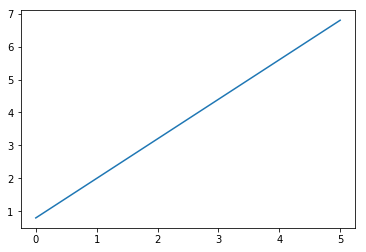

In [3]:
plt.plot(x,y)

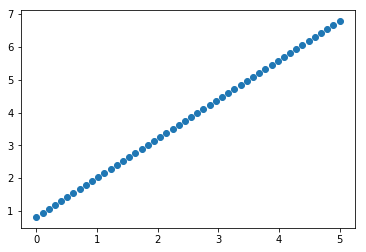

In [4]:
plt.scatter(x,y) # 50 dots

### 加入 noise 項，讓資料看起來更真實

In [5]:
y = 1.2*x + 0.8 + 0.5*np.random.randn(50) # random normal distribution

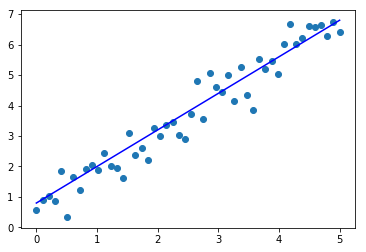

In [7]:
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8 , 'b')

## 做線性迴歸找出那條線

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
regr = LinearRegression() # 開一個空的學習機

### 注意我們本來的x是[x1,x2,...,x50]
### 但現在要的是[[x1],[x2],...,[x50]]，且這邊是50*1的矩陣(50列1行)



In [10]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [13]:
X = x.reshape(len(x),1)

In [14]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
Y = regr.predict(X)

In [18]:
regr.predict([[1.3]]) # 兩個中括號，表示只有一筆資料，沒有第二筆

array([2.21641055])

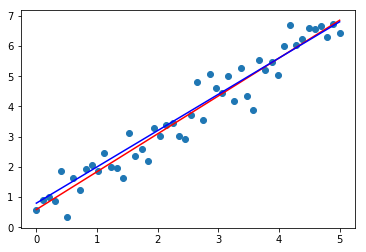

In [21]:
plt.scatter(x,y)
plt.plot(x,Y,'r') #預測結果
plt.plot(x, 1.2*x+0.8, 'b') # 正確解答

## 實際做分析時，需要將現有的資料分成兩批，訓練資料與測試資料，帶函式學成之後來測試準不準確
### 這時可以用 sklearn.cross_validation 裡的 train_test_split 來亂數選一定百分比的資料來用

In [22]:
x = np.linspace(0,5,200)
y = 1.2*x + 0.8 + 0.5 *np.random.randn(200)

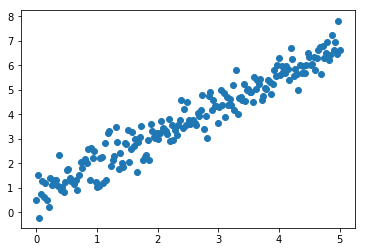

In [23]:
plt.scatter(x,y)

### Take 70% as training data, while 30% as testing data

In [25]:
from sklearn.model_selection import train_test_split # split randomly

In [26]:
X = x.reshape(len(x),1)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
#每次都隨機切，因此要固定切法，以便調整模組

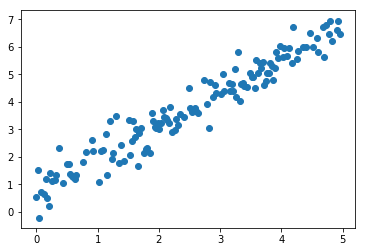

In [28]:
plt.scatter(x_train,y_train)

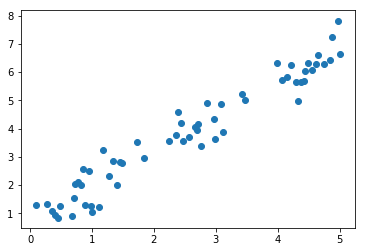

In [29]:
plt.scatter(x_test,y_test)

In [30]:
regr = LinearRegression()

In [31]:
regr.fit(x_train,y_train) #學習

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
Y_pred = regr.predict(x_test) #學習結果

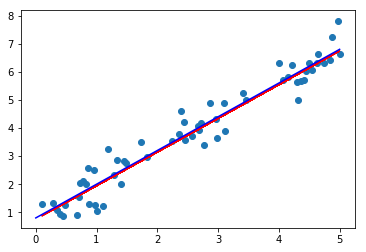

In [35]:
plt.scatter(x_test,y_test)
plt.plot(x_test,Y_pred,'r')
plt.plot(x, 1.2*x + 0.8, 'b')